<a href="https://colab.research.google.com/github/Sreejith-nair511/Summer_course_Ai/blob/main/custom_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔁 Training model...
Epoch [10/100], Loss: 42.3214
Epoch [20/100], Loss: 42.0968
Epoch [30/100], Loss: 41.8644
Epoch [40/100], Loss: 41.6027
Epoch [50/100], Loss: 41.2899
Epoch [60/100], Loss: 40.8973
Epoch [70/100], Loss: 40.3772
Epoch [80/100], Loss: 39.6480
Epoch [90/100], Loss: 38.5806
Epoch [100/100], Loss: 37.0122


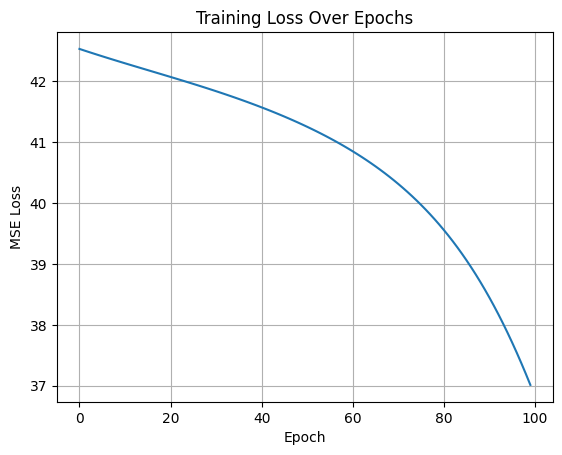


📊 Evaluating on test set...
Test Loss: 37.7860

🎯 Example Prediction:
Predicted: -1.1590
Actual Target: -2.7911


In [ ]:
# ✅ RNN Regression from Scratch with FC Output Layer (Google Colab Ready)

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# Step 1: Custom RNN Cell with Bias Embedded in Weight Matrix
# -----------------------------------------------------------
class SimpleRNNCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SimpleRNNCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Combined weight: input + hidden + bias row
        self.combined_weights = nn.Parameter(
            torch.Tensor(input_size + hidden_size + 1, hidden_size)
        )
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1.0 / torch.sqrt(torch.tensor(self.hidden_size, dtype=torch.float32))
        self.combined_weights.data.uniform_(-stdv, stdv)

    def forward(self, input, hidden):
        batch_size = input.size(0)
        bias_term = torch.ones(batch_size, 1, device=input.device)
        combined_input = torch.cat((input, hidden, bias_term), dim=1)
        next_hidden = torch.tanh(torch.matmul(combined_input, self.combined_weights))
        return next_hidden, next_hidden

# -----------------------------------------------------------
# Step 2: Simple RNN Model with Output Layer (FC)
# -----------------------------------------------------------
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super(SimpleRNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        if num_layers != 1:
            raise NotImplementedError("Only num_layers=1 supported")

        self.rnn_cell = SimpleRNNCell(input_size, hidden_size)

        # 🔥 Output layer: maps hidden state to single regression value
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, input_seq):
        seq_len, batch_size, _ = input_seq.size()
        hidden = torch.zeros(batch_size, self.hidden_size, device=input_seq.device)

        for t in range(seq_len):
            input_t = input_seq[t, :, :]
            hidden, _ = self.rnn_cell(input_t, hidden)

        output = self.fc(hidden)  # Final prediction
        return output

# -----------------------------------------------------------
# Step 3: Synthetic Dataset Generator
# -----------------------------------------------------------
def create_sequence_data(num_sequences, seq_len, input_size):
    sequences = torch.randn(num_sequences, seq_len, input_size)
    targets = torch.sum(sequences[:, :seq_len-1, :], dim=(1, 2))
    targets += 0.1 * torch.randn(num_sequences)
    return sequences, targets.unsqueeze(1)  # Shape: (batch, 1)

# -----------------------------------------------------------
# Step 4: Model Setup, Training
# -----------------------------------------------------------
input_size = 5
hidden_size = 10
seq_len = 10
num_sequences = 1000
learning_rate = 0.001
epochs = 100

# Create data
all_sequences, all_targets = create_sequence_data(num_sequences, seq_len, input_size)

# Normalize input data (optional but helpful)
mean = all_sequences.mean()
std = all_sequences.std()
all_sequences = (all_sequences - mean) / std

# Train-test split
train_size = int(0.8 * num_sequences)
train_sequences, train_targets = all_sequences[:train_size], all_targets[:train_size]
test_sequences, test_targets = all_sequences[train_size:], all_targets[train_size:]

# Transpose input shape to (seq_len, batch_size, input_size)
train_sequences = train_sequences.transpose(0, 1)
test_sequences = test_sequences.transpose(0, 1)

# Model, loss, optimizer
model = SimpleRNN(input_size, hidden_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# -----------------------------------------------------------
# Step 5: Training Loop
# -----------------------------------------------------------
loss_values = []
print("🔁 Training model...")
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(train_sequences)
    loss = criterion(outputs, train_targets)

    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()

    loss_values.append(loss.item())
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# -----------------------------------------------------------
# Step 6: Plot Loss
# -----------------------------------------------------------
plt.plot(loss_values)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

# -----------------------------------------------------------
# Step 7: Test Evaluation
# -----------------------------------------------------------
print("\n📊 Evaluating on test set...")
model.eval()
with torch.no_grad():
    test_outputs = model(test_sequences)
    test_loss = criterion(test_outputs, test_targets)
    print(f"Test Loss: {test_loss.item():.4f}")

# -----------------------------------------------------------
# Step 8: Single Sequence Prediction Example
# -----------------------------------------------------------
single_test_sequence = test_sequences[:, 0:1, :]
single_test_target = test_targets[0]

with torch.no_grad():
    single_output = model(single_test_sequence)

print("\n🎯 Example Prediction:")
print(f"Predicted: {single_output.item():.4f}")
print(f"Actual Target: {single_test_target.item():.4f}")


🔁 Training...
Epoch [  10/1000], Loss: 0.9606
Epoch [  20/1000], Loss: 0.9046
Epoch [  30/1000], Loss: 0.8363
Epoch [  40/1000], Loss: 0.6283
Epoch [  50/1000], Loss: 0.1958
Epoch [  60/1000], Loss: 0.0927
Epoch [  70/1000], Loss: 0.0869
Epoch [  80/1000], Loss: 0.0703
Epoch [  90/1000], Loss: 0.0564
Epoch [ 100/1000], Loss: 0.0456
Epoch [ 110/1000], Loss: 0.0414
Epoch [ 120/1000], Loss: 0.0381
Epoch [ 130/1000], Loss: 0.0352
Epoch [ 140/1000], Loss: 0.0327
Epoch [ 150/1000], Loss: 0.0305
Epoch [ 160/1000], Loss: 0.0286
Epoch [ 170/1000], Loss: 0.0269
Epoch [ 180/1000], Loss: 0.0254
Epoch [ 190/1000], Loss: 0.0240
Epoch [ 200/1000], Loss: 0.0228
Epoch [ 210/1000], Loss: 0.0222
Epoch [ 220/1000], Loss: 0.0216
Epoch [ 230/1000], Loss: 0.0211
Epoch [ 240/1000], Loss: 0.0206
Epoch [ 250/1000], Loss: 0.0201
Epoch [ 260/1000], Loss: 0.0197
Epoch [ 270/1000], Loss: 0.0192
Epoch [ 280/1000], Loss: 0.0188
Epoch [ 290/1000], Loss: 0.0183
Epoch [ 300/1000], Loss: 0.0179
Epoch [ 310/1000], Loss: 0

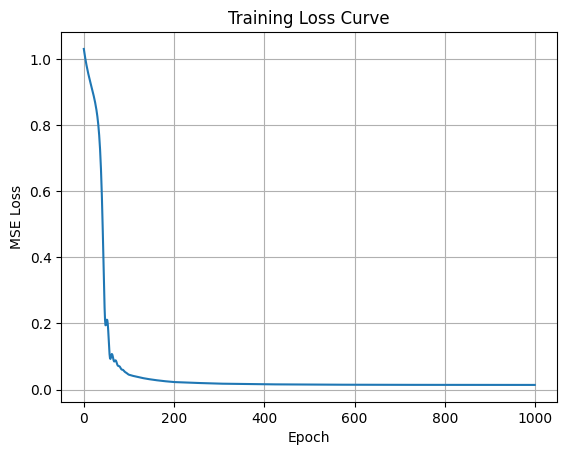


📊 Test Loss: 0.0215

🎯 Example Prediction (Denormalized):
Predicted: 9.94
Actual:    10.50


In [ ]:


import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# -----------------------------
# Custom RNN Cell
# -----------------------------
class SimpleRNNCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SimpleRNNCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.combined_weights = nn.Parameter(
            torch.Tensor(input_size + hidden_size + 1, hidden_size)
        )
        self.reset_parameters()
        #You're creating your own RNN cell by extending PyTorch's base class nn.Module.

#input_size = how many features each input step has.

#hidden_size = how many neurons are in the hidden layer (memory).



    def reset_parameters(self):
        stdv = 1.0 / torch.sqrt(torch.tensor(self.hidden_size, dtype=torch.float32))
        self.combined_weights.data.uniform_(-stdv, stdv)

    def forward(self, input, hidden):
        batch_size = input.size(0)
        bias_term = torch.ones(batch_size, 1, device=input.device)
        combined_input = torch.cat((input, hidden, bias_term), dim=1)
        next_hidden = torch.tanh(torch.matmul(combined_input, self.combined_weights))
        return next_hidden, next_hidden

# -----------------------------
# RNN Model with Output Layer
# -----------------------------
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SimpleRNN, self).__init__()
        self.rnn_cell = SimpleRNNCell(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, input_seq):
        seq_len, batch_size, _ = input_seq.size()
        hidden = torch.zeros(batch_size, self.rnn_cell.hidden_size, device=input_seq.device)

        for t in range(seq_len):
            input_t = input_seq[t, :, :]
            hidden, _ = self.rnn_cell(input_t, hidden)

        return self.fc(hidden)

# -----------------------------
# Synthetic Dataset Generator
# -----------------------------
def create_sequence_data(num_sequences, seq_len, input_size):
    sequences = torch.randn(num_sequences, seq_len, input_size)
    targets = torch.sum(sequences[:, :seq_len-1, :], dim=(1, 2))
    targets += 0.1 * torch.randn(num_sequences)
    return sequences, targets.unsqueeze(1)

# -----------------------------
# Training Parameters
# -----------------------------
input_size = 5
hidden_size = 32
seq_len = 10
num_sequences = 1000
learning_rate = 0.001
epochs = 1000
target_loss_threshold = 0.01

# -----------------------------
# Create and Normalize Data
# -----------------------------
all_sequences, all_targets = create_sequence_data(num_sequences, seq_len, input_size)

seq_mean, seq_std = all_sequences.mean(), all_sequences.std()
target_mean, target_std = all_targets.mean(), all_targets.std()

all_sequences = (all_sequences - seq_mean) / seq_std
all_targets = (all_targets - target_mean) / target_std

# Train-test split
train_size = int(0.8 * num_sequences)
train_seq, test_seq = all_sequences[:train_size], all_sequences[train_size:]
train_tgt, test_tgt = all_targets[:train_size], all_targets[train_size:]

train_seq = train_seq.transpose(0, 1)  # (seq_len, batch, input_size)
test_seq = test_seq.transpose(0, 1)

# -----------------------------
# Model, Optimizer, Scheduler
# -----------------------------
model = SimpleRNN(input_size, hidden_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)

# -----------------------------
# Training Loop
# -----------------------------
loss_values = []
print("🔁 Training...")

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    output = model(train_seq)
    loss = criterion(output, train_tgt)
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()

    loss_values.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1:>4}/{epochs}], Loss: {loss.item():.4f}")

    if loss.item() < target_loss_threshold:
        print(f"\n✅ Early stopping at epoch {epoch+1} with loss = {loss.item():.4f}")
        break

# -----------------------------
# Plot Training Loss
# -----------------------------
plt.plot(loss_values)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

# -----------------------------
# Evaluate on Test Set
# -----------------------------
model.eval()
with torch.no_grad():
    test_output = model(test_seq)
    test_loss = criterion(test_output, test_tgt)
    print(f"\n📊 Test Loss: {test_loss.item():.4f}")

# -----------------------------
# Example Prediction
# -----------------------------
example_seq = test_seq[:, 0:1, :]
actual_target = test_tgt[0]

with torch.no_grad():
    pred = model(example_seq)

# Denormalize output
pred_val = pred * target_std + target_mean
actual_val = actual_target * target_std + target_mean

print("\n🎯 Example Prediction (Denormalized):")
print(f"Predicted: {pred_val.item():.2f}")
print(f"Actual:    {actual_val.item():.2f}")
